In [1]:
import numpy as np

# Constants
n_iterations = 100  # number of iterations
n_device = [50, 100, 150, 200, 250, 300]  # number of devices
n_mecs = 10  # number of MECs
mec_capacity = 4  # MEC computing capacity (GHz)
transmission_power = 0.5  # Transmission power (W)

# Voltages (assumed constants)
mec_voltage = 1.0  # Assumed voltage for MEC
device_voltage = 1.0  # Assumed voltage for device

# Task data (Mbit)
task_data = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45])

# Transmission rate (kb/s)
transmission_rate = np.array([500, 1000, 1500, 2000, 2500, 3000]) * 1e-3  # Convert to Mbit/s

def fitness(position, device_capacity, td, tr):
    total_transmission_time = 0
    total_computation_time = 0
    total_energy_consumption = 0

    # Calculate the transmission time and the computation time
    transmission_time = td / tr
    total_transmission_time += transmission_time

    computation_time = td / (position * mec_capacity + (1 - position) * device_capacity)
    total_computation_time += computation_time

    # Calculate energy consumption
    energy_computation_mec = position * mec_capacity * mec_voltage**2  # energy consumed at MEC
    energy_computation_device = (1 - position) * device_capacity * device_voltage**2  # energy consumed at device
    energy_transmission = transmission_power * transmission_time  # energy consumed during transmission

    total_energy_consumption += energy_transmission + energy_computation_mec + energy_computation_device

    # Calculate the mean completion time (total time divided by number of tasks)
    mean_completion_time = (total_transmission_time + total_computation_time)
    # Total cost is sum of all transmission and computation times
    cost = total_transmission_time + total_computation_time

    return cost, total_energy_consumption, mean_completion_time

# Iterate over all device settings
for n in n_device:
    # Set the number of particles
    n_particles = n * n_mecs  # each particle represents a task offloading decision for a device to a MEC

    # Device computing capacity (GHz)
    device_capacity = np.random.uniform(0.5, 1, n_particles)  # generate device capacity for each particle

    # Task data and transmission rate for each particle
    task_data_per_particle = np.random.choice(task_data, n_particles)
    transmission_rate_per_particle = np.random.choice(transmission_rate, n_particles)

    # Initialize the particles' positions
    particles = np.random.uniform(low=0, high=1, size=(n_particles))  # range changed to 0 to 1

    # Initialize the personal best positions and the global best position
    pbest_positions = particles
    pbest_fitness_value = np.full(shape=n_particles, fill_value=float('inf'))
    gbest_fitness_value = float('inf')
    gbest_position = 0
    gbest_energy_consumption = float('inf')
    gbest_mean_completion_time = float('inf')

    # Start iterations
    for i in range(n_iterations):
        for j in range(n_particles):
            fitness_cadidate, energy_consumption, mean_completion_time = fitness(particles[j], device_capacity[j], task_data_per_particle[j], transmission_rate_per_particle[j])  # pass device capacity as an argument
            if(pbest_fitness_value[j] > fitness_cadidate):
                pbest_fitness_value[j] = fitness_cadidate
                pbest_positions[j] = particles[j]

            if(gbest_fitness_value > fitness_cadidate):
                gbest_fitness_value = fitness_cadidate
                gbest_position = particles[j]
                gbest_energy_consumption = energy_consumption
                gbest_mean_completion_time = mean_completion_time

        # update position based on quantum behaviour and ensure it's in [0, 1]
        particles = pbest_positions + 0.5 * np.random.rand(n_particles) * (gbest_position - pbest_positions)
        particles = np.clip(particles, 0, 1)  # keep particles within [0, 1]

    print(f"For {n} devices, the best position is {gbest_position}, with energy consumption {gbest_energy_consumption}, "
          f"and mean completion time {gbest_mean_completion_time} in iteration number {n_iterations}")


For 50 devices, the best position is 0.7807660258340562, with energy consumption 4.174699016463246, and mean completion time 3.1630607983369297 in iteration number 100
For 100 devices, the best position is 0.9518458765123268, with energy consumption 4.688795188061036, and mean completion time 2.9635281552244708 in iteration number 100
For 150 devices, the best position is 0.9789261055087334, with energy consumption 4.770042580389124, and mean completion time 2.936763005058797 in iteration number 100
For 200 devices, the best position is 0.9827650673349513, with energy consumption 4.781026682129481, and mean completion time 2.933229076212675 in iteration number 100
For 250 devices, the best position is 0.9730153202293771, with energy consumption 4.752319871937272, and mean completion time 2.9425067214225455 in iteration number 100
For 300 devices, the best position is 0.9989603494472843, with energy consumption 4.830211876746816, and mean completion time 2.9176428836546897 in iteration 

In [2]:
import numpy as np

# Constants
n_iterations = 100  # number of iterations
n_device = [50, 100, 150, 200, 250, 300]  # number of devices
n_mecs = 10  # number of MECs
mec_capacity = 4  # MEC computing capacity (GHz)
transmission_power = 0.5  # Transmission power (W)

# Voltages (assumed constants)
mec_voltage = 1.0  # Assumed voltage for MEC
device_voltage = 1.0  # Assumed voltage for device

# Task data (Mbit)
task_data = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45])
transmission_rate = np.array([500, 1000, 1500, 2000, 2500, 3000]) * 1e-3  # Convert to Mbit/s

def fitness(position, device_capacity, td, tr):
    transmission_time = td / tr
    computation_time = td / (position * mec_capacity + (1 - position) * device_capacity)

    energy_transmission = transmission_power * transmission_time  # energy consumed during transmission
    energy_computation_mec = position * mec_capacity * mec_voltage ** 2
    energy_computation_device = (1 - position) * device_capacity * device_voltage ** 2

    total_energy_consumption = energy_transmission + energy_computation_mec + energy_computation_device
    cost = transmission_time + computation_time
    mean_completion_time = cost  # Since the number of tasks is 1 per particle, total time is mean time

    return cost, total_energy_consumption, mean_completion_time

# Pre-compute random device capacities, task data, and transmission rates
# because they are the same for each iteration within the device setting loop.
for n in n_device:
    n_particles = n * n_mecs
    device_capacity = np.random.uniform(0.5, 1, n_particles)
    task_data_per_particle = np.random.choice(task_data, n_particles)
    transmission_rate_per_particle = np.random.choice(transmission_rate, n_particles)

    particles = np.random.uniform(0, 1, size=n_particles)
    pbest_positions = particles.copy()
    pbest_fitness_value = np.full(n_particles, float('inf'))

    gbest_fitness_value = float('inf')
    gbest_position = 0

    for i in range(n_iterations):
        fitness_values, energy_consumptions, mean_completion_times = np.vectorize(fitness)(particles, device_capacity, task_data_per_particle, transmission_rate_per_particle)

        # Update pbest and gbest
        update_pbest = fitness_values < pbest_fitness_value
        pbest_positions[update_pbest] = particles[update_pbest]
        pbest_fitness_value[update_pbest] = fitness_values[update_pbest]

        min_fitness_idx = np.argmin(fitness_values)
        if fitness_values[min_fitness_idx] < gbest_fitness_value:
            gbest_fitness_value = fitness_values[min_fitness_idx]
            gbest_position = particles[min_fitness_idx]
            gbest_energy_consumption = energy_consumptions[min_fitness_idx]
            gbest_mean_completion_time = mean_completion_times[min_fitness_idx]

        # Update particles' positions
        particles = pbest_positions + 0.5 * np.random.rand(n_particles) * (gbest_position - pbest_positions)
        particles = np.clip(particles, 0, 1)

    print(f"For {n} devices, the best position is {gbest_position}, with energy consumption {gbest_energy_consumption}, "
          f"and mean completion time {gbest_mean_completion_time} in iteration number {n_iterations}")


For 50 devices, the best position is 0.9273104463025167, with energy consumption 4.610402232552991, and mean completion time 2.9904444778241492 in iteration number 100
For 100 devices, the best position is 0.8670327790925138, with energy consumption 4.433484182668577, and mean completion time 3.055497359948098 in iteration number 100
For 150 devices, the best position is 0.9574166568923503, with energy consumption 4.705369207169375, and mean completion time 2.9579770168072193 in iteration number 100
For 200 devices, the best position is 0.9857025860538139, with energy consumption 4.790409434743665, and mean completion time 2.930225888643207 in iteration number 100
For 250 devices, the best position is 0.9816643965946589, with energy consumption 4.778282877582074, and mean completion time 2.9341099999507128 in iteration number 100
For 300 devices, the best position is 0.9752474766432917, with energy consumption 4.7586532253569915, and mean completion time 2.940448202321918 in iteration 

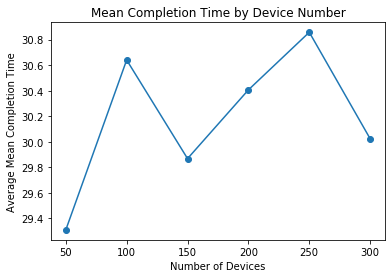

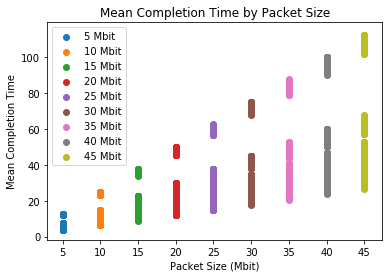

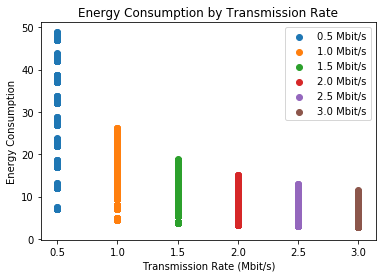

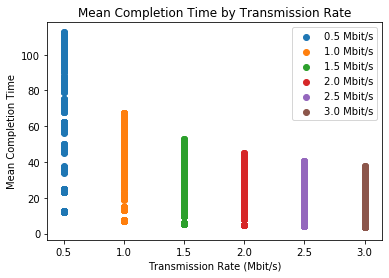

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
n_iterations = 100  # number of iterations
n_device = [50, 100, 150, 200, 250, 300]  # number of devices
n_mecs = 10  # number of MECs
mec_capacity = 4  # MEC computing capacity (GHz)
transmission_power = 0.5  # Transmission power (W)

# Voltages (assumed constants)
mec_voltage = 1.0  # Assumed voltage for MEC
device_voltage = 1.0  # Assumed voltage for device

# Task data (Mbit)
task_data = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45])
transmission_rate = np.array([500, 1000, 1500, 2000, 2500, 3000]) * 1e-3  # Convert to Mbit/s

def fitness(position, device_capacity, td, tr):
    transmission_time = td / tr
    computation_time = td / (position * mec_capacity + (1 - position) * device_capacity)
    mean_completion_time = transmission_time + computation_time

    energy_computation_mec = position * mec_capacity * mec_voltage**2
    energy_computation_device = (1 - position) * device_capacity * device_voltage**2
    energy_transmission = transmission_power * transmission_time

    energy_consumption = energy_transmission + energy_computation_mec + energy_computation_device
    
    # Some weighted sum of objectives. You can replace 0.5 by some other value or function to prioritize one over the other.
    total_cost = 0.02 * mean_completion_time + 0.02 * energy_consumption
    
    return total_cost, mean_completion_time, energy_consumption

# Initialize lists to collect statistics
mean_completion_by_device = []
mean_completion_by_packet_size = {td: [] for td in task_data}
energy_by_transmission_rate = {tr: [] for tr in transmission_rate}
mean_completion_by_transmission_rate = {tr: [] for tr in transmission_rate}

for n in n_device:
    n_particles = n * n_mecs
    device_capacity = np.random.uniform(0.5, 1, n_particles)
    task_data_per_particle = np.random.choice(task_data, n_particles)
    transmission_rate_per_particle = np.random.choice(transmission_rate, n_particles)

    particles = np.random.uniform(0, 1, size=n_particles)
    pbest_positions = particles.copy()
    pbest_fitness_value = np.full(n_particles, float('inf'))

    gbest_fitness_value = float('inf')
    gbest_position = 0

    for i in range(n_iterations):
        mean_completion_times = []
        energy_consumptions = []
        total_costs = []
        
        for j in range(n_particles):
            total_cost, mean_time, energy = fitness(particles[j], device_capacity[j], task_data_per_particle[j], transmission_rate_per_particle[j])
            total_costs.append(total_cost)
            mean_completion_times.append(mean_time)
            energy_consumptions.append(energy)

            if pbest_fitness_value[j] > total_cost:
                pbest_fitness_value[j] = total_cost
                pbest_positions[j] = particles[j]

            if gbest_fitness_value > total_cost:
                gbest_fitness_value = total_cost
                gbest_position = particles[j]


        # Update particles' positions
        particles = pbest_positions + 0.5 * np.random.rand(n_particles) * (gbest_position - pbest_positions)
        particles = np.clip(particles, 0, 1)
        
    # Collect statistics
    mean_completion_by_device.append(np.mean(mean_completion_times))
    
    for td, tr, energy, time in zip(task_data_per_particle, transmission_rate_per_particle, energy_consumptions, mean_completion_times):
        mean_completion_by_packet_size[td].append(time)
        energy_by_transmission_rate[tr].append(energy)
        mean_completion_by_transmission_rate[tr].append(time)

# Plotting
plt.figure()
plt.plot(n_device, mean_completion_by_device, marker='o')
plt.xlabel('Number of Devices')
plt.ylabel('Average Mean Completion Time')
plt.title('Mean Completion Time by Device Number')
plt.show()

plt.figure()
for td, times in mean_completion_by_packet_size.items():
    plt.scatter([td]*len(times), times, label=f'{td} Mbit')
plt.xlabel('Packet Size (Mbit)')
plt.ylabel('Mean Completion Time')
plt.title('Mean Completion Time by Packet Size')
plt.legend()
plt.show()

plt.figure()
for tr, energy in energy_by_transmission_rate.items():
    plt.scatter([tr]*len(energy), energy, label=f'{tr} Mbit/s')
plt.xlabel('Transmission Rate (Mbit/s)')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption by Transmission Rate')
plt.legend()
plt.show()

plt.figure()
for tr, times in mean_completion_by_transmission_rate.items():
    plt.scatter([tr]*len(times), times, label=f'{tr} Mbit/s')
plt.xlabel('Transmission Rate (Mbit/s)')
plt.ylabel('Mean Completion Time')
plt.title('Mean Completion Time by Transmission Rate')
plt.legend()
plt.show()
